In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd

# 1. 데이터 셋 로드
df = pd.read_csv('winequality-red.csv')

# 결측치 확인
print(df.isnull().sum())

# feature(X), target(y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 데이터 분할 (학습용/테스트용)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# 모델 평가
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.5035304415524375
MSE: 0.39002514396395427
RMSE: 0.39002514396395427
R2 Score: 0.4031803412796229


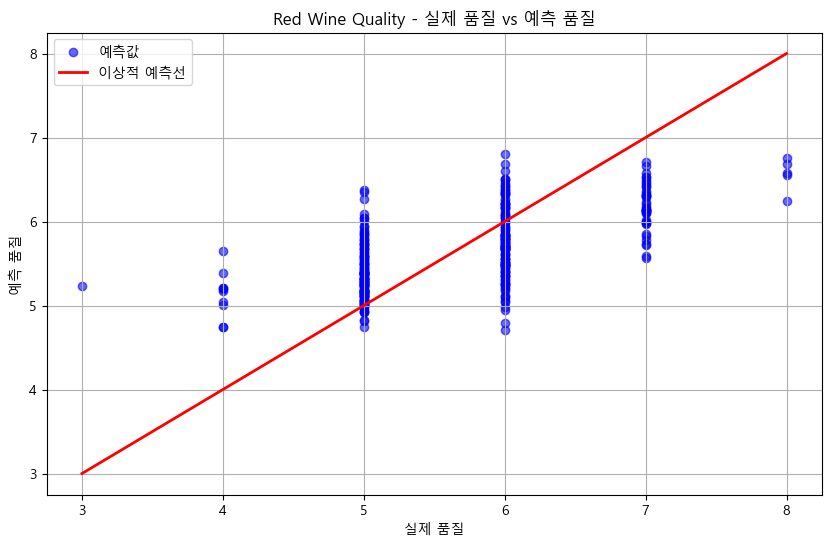

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='예측값')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='이상적 예측선')

plt.xlabel('실제 품질')
plt.ylabel('예측 품질')
plt.title('Red Wine Quality - 실제 품질 vs 예측 품질')
plt.legend()
plt.grid(True)
plt.show()